# Pytorch Tensors

The torch package contains data structures for multi-dimensional tensors and mathematical operations over these are defined. In particular it provides automatic differientation.

A [torch.Tensor](https://pytorch.org/docs/stable/tensors.html) is a multi-dimensional matrix containing elements of a single data type.

In [1]:
import torch
import numpy as np

In [2]:
x=torch.tensor([2.])
x.shape

torch.Size([1])

In [3]:
torch.zeros([2, 4], dtype=torch.int32)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)

In [4]:
cpu = torch.device('cpu')
cuda = torch.device('cuda')
torch.ones([2, 4, 3], dtype=torch.float64, device=cpu)

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]], dtype=torch.float64)

The contents of a tensor can be accessed and modified using Python’s indexing and slicing notation:

In [5]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(x[1][2])
x[0][1] = 8
print(x)

tensor(6)
tensor([[1, 8, 3],
        [4, 5, 6]])


- We should try to operate on tensors using build-in functions.

Use torch.Tensor.item() to get a Python number from a tensor containing a single value:

In [6]:
x = torch.tensor(2.5)
x

tensor(2.5000)

In [7]:
x.item()

2.5

In [8]:
x = torch.arange(0,20,2)
x

tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [9]:
x = torch.rand(3, 4)
x

tensor([[0.7891, 0.8052, 0.8826, 0.9388],
        [0.8475, 0.6633, 0.5843, 0.6857],
        [0.5549, 0.0013, 0.6790, 0.4979]])

In [10]:
x = torch.randint(0, 10, (2, 10))
x

tensor([[9, 6, 7, 8, 2, 4, 1, 5, 7, 0],
        [5, 2, 1, 8, 6, 9, 1, 4, 5, 1]])

## Operations with tensors

In [11]:
def compute_reciprocals(values): 
    output = torch.empty(len(values)) 
    for i in range(len(values)):
        output[i] = 1.0 / values[i] 
    return output

values = torch.randint(1, 10, (5,))
compute_reciprocals(values)

tensor([0.5000, 0.1429, 0.1667, 0.1429, 0.5000])

In [12]:
big_array = np.random.randint(1, 100, (1000000,))
%timeit compute_reciprocals(big_array)

8.01 s ± 98.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
print(compute_reciprocals(values)) 
print(1.0 / values)

tensor([0.5000, 0.1429, 0.1667, 0.1429, 0.5000])
tensor([0.5000, 0.1429, 0.1667, 0.1429, 0.5000])


In [14]:
%timeit (1.0 / big_array)

3.78 ms ± 230 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
import math
import time
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
ns = [int(math.pow(2,i)) for i in range(5,13)]
ns

[32, 64, 128, 256, 512, 1024, 2048, 4096]

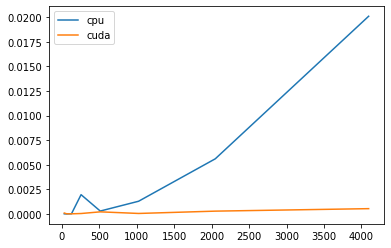

In [17]:
t_cpu = []
t_cuda = []
for n in ns:
    # Compute matrix multiplication of n by n matrices with cpu   
    A = torch.rand(n,n).to(cpu)
    B = torch.rand(n,n).to(cpu)
    tic =  time.perf_counter()
    A.mul(B)
    toc =  time.perf_counter()
    t_cpu.append(toc - tic)

    # Compute matrix multiplication of n by n matrices with gpu  
    A = torch.rand(n,n).to(cuda)
    B = torch.rand(n,n).to(cuda)
    tic =  time.perf_counter()
    A.mul(B)
    toc =  time.perf_counter()
    t_cuda.append(toc - tic)

plt.plot(ns,t_cpu,label="cpu")
plt.plot(ns,t_cuda,label="cuda")
plt.legend()

plt.show()

## Reshaping tensors

PyTorch allows a tensor to be a View of an existing tensor. View tensor shares the same underlying data with its base tensor. Supporting View avoids explicit data copy, thus allows us to do fast and memory efficient reshaping, slicing and element-wise operations.

In [18]:
t = torch.rand(4, 4)
print(t)
b = t.view(2, 8)
print(b)
t.storage().data_ptr() == b.storage().data_ptr()

tensor([[0.5921, 0.6978, 0.4080, 0.8558],
        [0.4952, 0.2151, 0.5431, 0.4739],
        [0.8543, 0.3231, 0.3198, 0.2494],
        [0.8519, 0.4448, 0.1891, 0.5932]])
tensor([[0.5921, 0.6978, 0.4080, 0.8558, 0.4952, 0.2151, 0.5431, 0.4739],
        [0.8543, 0.3231, 0.3198, 0.2494, 0.8519, 0.4448, 0.1891, 0.5932]])


True

### torch.view(*shape)
Returns a new tensor with the same data as the self tensor but of a different shape.

The returned tensor shares the same data and must have the same number of elements, but may have a different size. For a tensor to be viewed, the new view size must be compatible with its original size and stride, i.e., 
- each new view dimension must either be a subspace of an original dimension, or 
- only span across original dimensions $d,d+1,…,d+k$ that satisfy the following contiguity-like condition that $\forall i=d,…,d+k−1$,
$$
stride[i]=stride[i+1]×size[i+1]
$$
Otherwise, it will not be possible to view self tensor as shape without copying it (e.g., via contiguous()). When it is unclear whether a view() can be performed, it is advisable to use reshape(), which returns a view if the shapes are compatible, and copies (equivalent to calling contiguous()) otherwise.

In [19]:
x = torch.arange(1,17)
x

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [20]:
x.stride()

(1,)

In [21]:
xx = x.view(2,8)
xx

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16]])

In [22]:
xx.stride()

(8, 1)

In [23]:
y = x.view(2,2,4)
y

tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8]],

        [[ 9, 10, 11, 12],
         [13, 14, 15, 16]]])

In [24]:
y.stride()

(8, 4, 1)

In [25]:
arr = torch.arange(12).reshape(3,4)
arr

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [26]:
arr2 = arr.T
arr2

tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])

In [27]:
arr.storage().data_ptr() == arr2.storage().data_ptr()

True

In [28]:
arr2.stride()

(1, 4)

In [29]:
arr2.size()

torch.Size([4, 3])

In [36]:
arr2.view(12)

RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

In [37]:
arr.view(4,3)

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

## Broadcasting
The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.

Two tensors are “broadcastable” if the following rules hold:

- Each tensor has at least one dimension.
- When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.


In [38]:
a = torch.tensor([0, 1, 2])
b = torch.tensor([5, 5, 5])
a+b

tensor([5, 6, 7])

In [39]:
M = torch.ones((3,3))
M

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [40]:
M+2.

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

In [41]:
a+M

tensor([[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]])

In [42]:
M = torch.ones((3, 2))
a = torch.arange(3)

In [44]:
M.T + a

tensor([[1., 2., 3.],
        [1., 2., 3.]])

## Broadcasting in Practice

Broadcasting provides a convenient way of taking the outer product (or any other outer operation) of two arrays. The following example shows an outer addition operation of two 1-d arrays:

In [45]:
a = torch.tensor([0.0, 10.0, 20.0, 30.0])
b = torch.tensor([1.0, 2.0, 3.0])
torch.unsqueeze(a,1)+b

tensor([[ 1.,  2.,  3.],
        [11., 12., 13.],
        [21., 22., 23.],
        [31., 32., 33.]])

How functions and modules oparate over tensors

In [46]:
lin = torch.nn.Linear(5,2)
data = torch.rand(10,5)
lin(data)

tensor([[0.1505, 0.0870],
        [0.1345, 0.6126],
        [0.1678, 0.0852],
        [0.1731, 0.4288],
        [0.1006, 0.1130],
        [0.2546, 0.3757],
        [0.1349, 0.2973],
        [0.0786, 0.2054],
        [0.0701, 0.3902],
        [0.0862, 0.2334]], grad_fn=<AddmmBackward>)

In [47]:
lin(torch.tensor([1., 2., 3., 4., 5.]))

tensor([-1.0999,  1.6780], grad_fn=<AddBackward0>)

In [48]:
data2 = torch.rand(3,2,5)
lin(data2)

tensor([[[0.1001, 0.0724],
         [0.1650, 0.4084]],

        [[0.0991, 0.2257],
         [0.1949, 0.2462]],

        [[0.1003, 0.1232],
         [0.1402, 0.2127]]], grad_fn=<AddBackward0>)

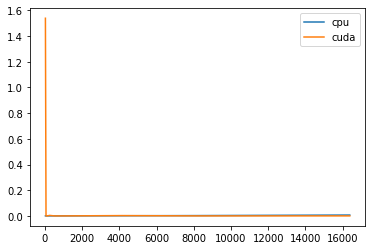

In [49]:
t_cpu = []
t_cuda = []
lin_cpu = torch.nn.Linear(1000,10).to(cpu)
lin_gpu = torch.nn.Linear(1000,10).to(cuda)
batch = [int(math.pow(2,i)) for i in range(5,15)]
for n in batch:
    # Compute linear model with cpu   
    data = torch.rand(n,1000).to(cpu)
    tic =  time.perf_counter()
    lin_cpu(data)
    toc =  time.perf_counter()
    t_cpu.append(toc - tic)

    # Compute matrix multiplication of n by n matrices with gpu  
    data = torch.rand(n,1000).to(cuda)
    tic =  time.perf_counter()
    lin_gpu(data)
    toc =  time.perf_counter()
    t_cuda.append(toc - tic)

plt.plot(batch,t_cpu,label="cpu")
plt.plot(batch,t_cuda,label="cuda")
plt.legend()

plt.show()

## Other useful tesor operations
- Permutations
- Concatenations, stack
- Gather